## Observations and Insights 

In [448]:
# Dependencies and Setup
import matplotlib.pyplot as plt

import scipy.stats as st
import os
import pandas as pd

# import pandas as pd
# Study data files

mouse_metadata_path = os.path.join(".","data","Mouse_metadata.csv")
study_results_path = os.path.join(".","data","Study_results.csv")
pd.set_option("display.max_rows",1893)
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# mouse_metadata
# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results,on = 'Mouse ID' )
# Display the data table for preview


In [449]:
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [450]:
df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [452]:
df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [453]:
df.columns.values

array(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype=object)

In [454]:
# Checking the number of mice.
number_od_mice = df['Mouse ID'].count()
number_od_mice

1893

In [455]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = df.copy()
duplicates = df[df.duplicated(['Mouse ID','Timepoint'])]
duplicates.index

Int64Index([909, 911, 913, 915, 917], dtype='int64')

In [456]:
# Optional: Get all the data for the duplicate mouse ID. 

# Mouse_ID,Drug_Regimen,Sex,Age_months,Weight(g),Timepoint,Tumor_Volume,Metastatic_Sites
# Mouse_ID = list(df[df.duplicated()].values)
# print('Mouse_ID of {} undergoing drug regimen {} of gender {} age {} and weight {}  at Timepoint {} having Tumor Volume  {}
# with Metastatic Sites {}'.format(*str(Mouse_ID)))
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [458]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df.drop(duplicates.index)
df.reset_index(inplace=True,drop= True)
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [459]:
# Checking the number of mice in the clean DataFrame.
total_number,*_ = df.count()
total_number

1883

## Summary Statistics

In [460]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
statistics = df.copy()
statistics.set_index('Drug Regimen',inplace=True)
mean = statistics.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median = statistics.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
variance = statistics.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
standard_deviation = statistics.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
sem = statistics.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'variance': variance,
    'STD': standard_deviation,
    'SEM': sem,
    
})

summary_df

,Mean,Median,variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.266468,53.721242,68.742491,8.291109,0.606306
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.333232,50.783528,43.409918,6.588620,0.534408
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [461]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function 
summary_statistics = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.266468,53.721242,68.742491,8.291109,0.606306
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.333232,50.783528,43.409918,6.588620,0.534408
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

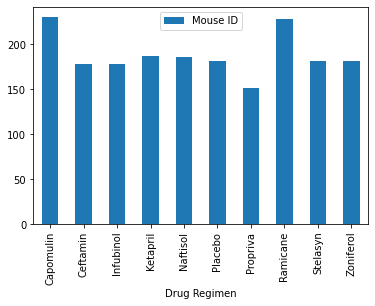

In [462]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
selected_df = df[['Drug Regimen','Mouse ID']]
selected_df_bar = selected_df.groupby(["Drug Regimen"]).count().reset_index()
selected_df_bar.plot.bar(x = 'Drug Regimen', y = 'Mouse ID')
plt.show()

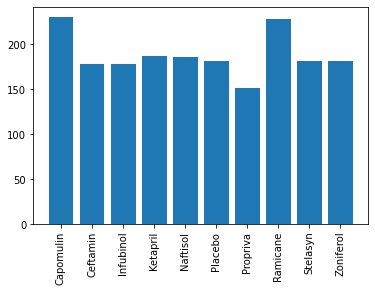

In [463]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x = selected_df_bar['Drug Regimen']
y = selected_df_bar['Mouse ID']
plt.bar(x,y)
plt.xticks(rotation ='vertical')
plt.show()

In [464]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot = df[['Sex','Mouse ID']]
pie_plot = pie_plot.groupby('Sex')['Mouse ID'].nunique()
# pie_plot['Sex'].value_counts()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000248D2E7C7C0>],
      dtype=object)

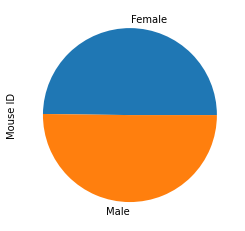

In [465]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plot.plot(kind='pie',subplots =True)


## Quartiles, Outliers and Boxplots

In [466]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
quartiles_df = df
filtering_values = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
quartiles_df = quartiles_df[df['Drug Regimen'].isin(filtering_values)]
timepoint_max = quartiles_df.loc[df['Timepoint'] == df['Timepoint'].max()]
timepoint_max = timepoint_max.sort_values(by=['Drug Regimen'])
# timepoint_max = timepoint_max.set_index('Drug Regimen',drop=False)
timepoint_max.reset_index(drop=True,inplace = True)

# timepoint_max.loc['Capomulin','Tumor Volume (mm3)']
# quartiles_df['Tumor Volume (mm3)'].sort_values(ascending = True)
# timepoint_45 = quartiles_df.loc[quartiles_df['Timepoint']==45]
# # # Start by getting the last (greatest) timepoint for each mouse
# timepoint_45
# mouse_metadata
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# merged_df = pd.merge(timepoint_45,mouse_metadata,on = ['Mouse ID','Drug Regimen','Sex','Age_months','Weight (g)'])
# merged_df


timepoint_max

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,v923,Capomulin,Female,19,21,45,40.658124,2
1,r944,Capomulin,Male,12,25,45,41.581521,2
2,l509,Capomulin,Male,17,21,45,41.483008,3
3,s710,Capomulin,Female,1,23,45,40.728578,1
4,g316,Capomulin,Female,22,22,45,40.159220,2
5,j119,Capomulin,Female,7,23,45,38.125164,1
6,b128,Capomulin,Female,9,22,45,38.982878,2
7,b742,Capomulin,Male,7,21,45,38.939633,0
8,l897,Capomulin,Male,17,19,45,38.846876,1
9,g288,Capomulin,Male,3,19,45,37.074024,1


In [467]:
quartiles_df_1 = df
new = quartiles_df_1.groupby(['Mouse ID','Timepoint'])['Tumor Volume (mm3)'].max()
new
new_1 = pd.merge(new,quartiles_df_1,on = ['Mouse ID','Tumor Volume (mm3)'])
filtering_values = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
new_1 = new_1[new_1['Drug Regimen'].isin(filtering_values)]
new_1 = new_1.loc[new_1['Timepoint'] == new_1['Timepoint'].max()]
new_1 = new_1.sort_values(by=['Drug Regimen'])
new_1.reset_index(drop=True,inplace=True)
new_1

,Mouse ID,Tumor Volume (mm3),Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites
0,l509,41.483008,Capomulin,Male,17,21,45,3
1,m601,28.430964,Capomulin,Male,22,17,45,1
2,m957,33.329098,Capomulin,Female,3,19,45,1
3,r554,32.377357,Capomulin,Female,8,17,45,3
4,j119,38.125164,Capomulin,Female,7,23,45,1
5,i738,37.311846,Capomulin,Female,23,20,45,2
6,i557,47.685963,Capomulin,Female,1,24,45,1
7,r944,41.581521,Capomulin,Male,12,25,45,2
8,s185,23.343598,Capomulin,Female,3,17,45,1
9,s710,40.728578,Capomulin,Female,1,23,45,1


['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']


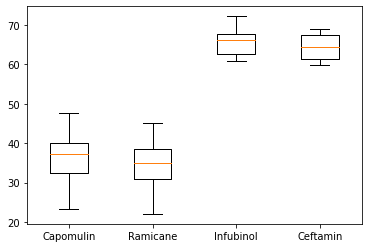

In [468]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = list(timepoint_max['Drug Regimen'].unique())
print(treatments)
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []
# Create empty list to fill with tumor vol data (for plotting)



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    #    # Locate the rows which contain mice on each drug and get the tumor volumes
#        timepoint_max.loc[timepoint_max['Drug Regimen'] == drug]['Tumor Volume (mm3)']
       tumor_vol_list.append(timepoint_max.loc[timepoint_max['Drug Regimen'] == drug]['Tumor Volume (mm3)'])
     # add subset 

     # Determine outliers using upper and lower bounds
plt.boxplot(tumor_vol_list, labels = treatment_list)
plt.show()

In [469]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

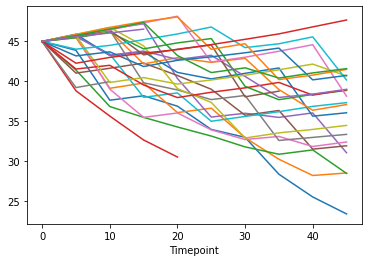

In [499]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df_line = df.loc[df['Drug Regimen'] == 'Capomulin']
df_line = df_line.reset_index(drop = True)
mouses = df_line['Mouse ID'].unique()
df_line = df_line.groupby(['Mouse ID','Timepoint'])['Tumor Volume (mm3)'].max()
for mouse in mouses:
     df_line[mouse].plot(kind = 'line',x = 'Timepoint',y ='Tumor Volume (mm3)', label = mouse )
     

In [420]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df_scatter = df

## Correlation and Regression

In [421]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
